In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import mir_utils as miru
import feature_functions as ff
import madmom as md
import librosa
import multiprocessing
import sounddevice as sd
import matplotlib.pyplot as plt
import imageio
import os
sr=41000
df=miru.audioFrames()
save_dir="CNN_Data"

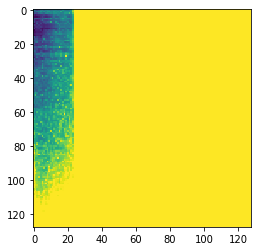

In [6]:
# this function makes 128x128 image of a melspec from any audio. 
# uncertainty: what's the best value for n_fft?
def audToImage(x,img_dim=128):
    xt,i=librosa.effects.trim(x, top_db=20)
    xt=librosa.util.normalize(xt)
    num_samples=2*img_dim**2-img_dim
    cut=xt[0:num_samples]
    cut=np.pad(cut,(0,num_samples-cut.shape[0]),'constant')
    D=librosa.stft(cut,n_fft=int((img_dim*4*2)),hop_length=img_dim*2)
    S = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=img_dim)
    S_dB = librosa.power_to_db(np.abs(S)**2)
    return S_dB
z=audToImage(df.iloc[1]["audio"])
z=-1*librosa.util.normalize(z)
plt.imshow(z)

In [3]:
#make directoies
folders=df.label.unique()
for f in folders:
    directory="./%s/%s/%s"%(save_dir,"train",f)
    if not os.path.exists(directory):
        os.makedirs(directory)
    directory="./%s/%s/%s"%(save_dir,"test",f)
    if not os.path.exists(directory):
        os.makedirs(directory)

In [ ]:
#convert all audio in dataframe to images and put them in folders depending on the labels
for i,r in df.iterrows():
    z=audToImage(r["audio"])
    fname=r["path"].split("/")[-1]
    p="./%s/%s/%s/%s.png"%(save_dir,"train",r["label"],fname)
    imageio.imsave(p,z)